This is a simple example of how you can use Gradio in a Kaggle notebook (prompted by a question from a student). 

In [83]:
#|default_exp app

In [16]:
%pip install -q gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%pip install nbdev

  Obtaining dependency information for nbdev from https://files.pythonhosted.org/packages/45/44/2148be2391edd62b8c88c2114f380141b72276901a53d590be9f769a68e4/nbdev-2.3.13-py3-none-any.whl.metadata
  Using cached execnb-0.1.5-py3-none-any.whl (13 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for ghapi>=1.0.3 from https://files.pythonhosted.org/packages/60/71/064560201c434c22c9f395878ba0f21f9ede8169e61c1a109f26a377bd5e/ghapi-1.0.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
     ---------------------------------------- 82.0/82.0 kB 4.5 MB/s eta 0:00:00
  Obtaining dependency information for wheel<1.0,>=0.23.0 from https://files.pythonhosted.org/packages/c7/c3/55076fc728723ef927521abaa1955213d094933dc36d4a2008d5101e1af5/wheel-0.42.0-py3-none-any.whl.metadata
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
Using cached nbdev-2.3.13-py3-none-any.whl (66 kB)
Using cached 


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:

%pip install -Uqq fastai fastbook

Note: you may need to restart the kernel to use updated packages.


In [84]:
#|export
from fastai.vision.all import *
import gradio as gr

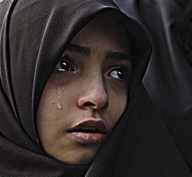

In [61]:
im=PILImage.create('sad2.jpg')
im.thumbnail((192,192))
im

In [85]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [86]:
#|export
lear=load_learner('humansenti.pkl')

In [62]:
lear.predict(im)

('sad', tensor(2), tensor([3.5014e-03, 4.9885e-03, 9.9138e-01, 1.3225e-04]))

In [87]:
#|export
categories=('angry','happy','sad','stressed')
def classify_image(img):
    pred,idx,probs=lear.predict(img)
    return dict(zip(categories,map(float,probs)))


In [64]:
classify_image(im)

{'angry': 0.00350139569491148,
 'happy': 0.004988532047718763,
 'sad': 0.9913778305053711,
 'stressed': 0.000132248955196701}

In [65]:
new=PILImage.create('happy.jpg')

In [66]:
new.thumbnail((192,192))

In [ ]:
classify_image(new)

{'angry': 0.07223629206418991,
 'happy': 0.834700345993042,
 'sad': 0.019516445696353912,
 'stressed': 0.07354704290628433}

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [88]:
#|export
image=gr.Image()
label=gr.Label()
examples=['happy.jpg','sad.jpg']
intf=gr.Interface(fn=classify_image,inputs=[image],outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [6]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful


In [ ]:
??nbdev.export.nb_export